# Problem 6: Uniform Distribution Estimators

This notebook addresses **Problem 6(c)** from PS3, which compares the **Method of Moments (MM)** and **Maximum Likelihood (MLE)** estimators for the uniform distribution $X \sim U(0,\theta)$.

## Overview

For the uniform distribution $X \sim U(0,\theta)$:
- **MLE estimator**: $\widehat{\theta}_{ML} = \max(X_1, ..., X_n)$
- **MM estimator**: $\widehat{\theta}_{MM} = 2\bar{X}$, where $\bar{X}$ is the sample mean

### Theoretical Properties (from part b)

**MM Estimator:**
- $\mathrm{E}[\hat{\theta}_{MM}] = \theta_0$ (unbiased)
- $\mathrm{Var}[\hat{\theta}_{MM}] = \frac{\theta_0^2}{3n}$

**MLE Estimator:**
- $\mathrm{E}[\hat{\theta}_{MLE}] = \frac{n}{n+1}\theta_0$ (biased)
- $\mathrm{Var}[\hat{\theta}_{MLE}] = \frac{\theta_0^2}{n(n+2)}$

Both estimators are **consistent** (converge to $\theta_0$ as $n \to \infty$).


## Setup and Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Try to import seaborn, but continue without it if not available
try:
    import seaborn as sns
    sns.set_palette("husl")
    HAS_SEABORN = True
except ImportError:
    HAS_SEABORN = False

# Set style for better plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
        print("Using default matplotlib style")

# Set random seed for reproducibility
np.random.seed(42)


## Simulation Parameters

We'll simulate:
- **True parameter**: $\theta_0 = 1$
- **Sample sizes**: $n = 20, 100, 1000$
- **Number of simulations**: 10,000 samples for each $n$


In [11]:
# Simulation parameters
theta_true = 1.0  # True value of theta
n_values = [20, 100, 1000]  # Sample sizes
n_simulations = 10000  # Number of samples to draw for each n

print(f"Simulation setup:")
print(f"  True θ = {theta_true}")
print(f"  Sample sizes n = {n_values}")
print(f"  Number of simulations = {n_simulations}")


Simulation setup:
  True θ = 1.0
  Sample sizes n = [20, 100, 1000]
  Number of simulations = 10000


## Helper Functions

Define functions to compute the estimators and theoretical properties:


In [19]:
def compute_mle_estimator(sample):
    """Compute MLE estimator: max(X_1, ..., X_n)"""
    return np.max(sample)

def compute_mm_estimator(sample):
    """Compute MM estimator: 2 * sample_mean"""
    return 2 * np.mean(sample)

def theoretical_mm_mean(theta, n):
    """Theoretical mean of MM estimator"""
    return theta

def theoretical_mm_var(theta, n):
    """Theoretical variance of MM estimator"""
    return theta**2 / (3 * n)

def theoretical_mle_mean(theta, n):
    """Theoretical mean of MLE estimator"""
    return (n / (n + 1)) * theta

def theoretical_mle_var(theta, n):
    """Theoretical variance of MLE estimator"""
    return theta**2 / (n * (n + 2))


## Simulation Function

Function to run the simulation for a given sample size:


In [27]:
def simulate_estimators(theta, n, n_simulations):
    """
    Simulate MLE and MM estimators for uniform distribution.
    
    Parameters:
    -----------
    theta : float
        True value of theta
    n : int
        Sample size
    n_simulations : int
        Number of simulations
    
    Returns:
    --------
    mle_estimates : array
        Array of MLE estimates
    mm_estimates : array
        Array of MM estimates
    """
    mle_estimates = np.zeros(n_simulations)
    mm_estimates = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        # Draw sample from U(0, theta)
        sample = np.random.uniform(0, theta, size=n)
        
        # Compute estimators
        mle_estimates[i] = compute_mle_estimator(sample)
        mm_estimates[i] = compute_mm_estimator(sample)
    
    return mle_estimates, mm_estimates


## Run Simulations

Run simulations for each sample size:


In [34]:
# Store results for each n
results = {}

for n in n_values:
    print(f"\n{'='*60}")
    print(f"Simulating for n = {n}")
    print(f"{'='*60}")
    
    mle_est, mm_est = simulate_estimators(theta_true, n, n_simulations)
    
    # Compute statistics
    mle_mean = np.mean(mle_est)
    mle_std = np.std(mle_est, ddof=1)
    mle_bias = mle_mean - theta_true
    
    mm_mean = np.mean(mm_est)
    mm_std = np.std(mm_est, ddof=1)
    mm_bias = mm_mean - theta_true
    
    # Theoretical values
    mle_mean_theory = theoretical_mle_mean(theta_true, n)
    mle_var_theory = theoretical_mle_var(theta_true, n)
    mle_std_theory = np.sqrt(mle_var_theory)
    mle_bias_theory = mle_mean_theory - theta_true
    
    mm_mean_theory = theoretical_mm_mean(theta_true, n)
    mm_var_theory = theoretical_mm_var(theta_true, n)
    mm_std_theory = np.sqrt(mm_var_theory)
    mm_bias_theory = mm_mean_theory - theta_true
    
    results[n] = {
        'mle_estimates': mle_est,
        'mm_estimates': mm_est,
        'mle_mean': mle_mean,
        'mle_std': mle_std,
        'mle_bias': mle_bias,
        'mm_mean': mm_mean,
        'mm_std': mm_std,
        'mm_bias': mm_bias,
        'mle_mean_theory': mle_mean_theory,
        'mle_std_theory': mle_std_theory,
        'mle_bias_theory': mle_bias_theory,
        'mm_mean_theory': mm_mean_theory,
        'mm_std_theory': mm_std_theory,
        'mm_bias_theory': mm_bias_theory
    }
    
    print(f"\nMLE Estimator:")
    print(f"  Empirical Mean: {mle_mean:.6f} (Theory: {mle_mean_theory:.6f})")
    print(f"  Empirical Bias: {mle_bias:.6f} (Theory: {mle_bias_theory:.6f})")
    print(f"  Empirical Std:  {mle_std:.6f} (Theory: {mle_std_theory:.6f})")
    
    print(f"\nMM Estimator:")
    print(f"  Empirical Mean: {mm_mean:.6f} (Theory: {mm_mean_theory:.6f})")
    print(f"  Empirical Bias: {mm_bias:.6f} (Theory: {mm_bias_theory:.6f})")
    print(f"  Empirical Std:  {mm_std:.6f} (Theory: {mm_std_theory:.6f})")



Simulating for n = 20

MLE Estimator:
  Empirical Mean: 0.952595 (Theory: 0.952381)
  Empirical Bias: -0.047405 (Theory: -0.047619)
  Empirical Std:  0.045437 (Theory: 0.047673)

MM Estimator:
  Empirical Mean: 0.997899 (Theory: 1.000000)
  Empirical Bias: -0.002101 (Theory: 0.000000)
  Empirical Std:  0.128978 (Theory: 0.129099)

Simulating for n = 100

MLE Estimator:
  Empirical Mean: 0.990217 (Theory: 0.990099)
  Empirical Bias: -0.009783 (Theory: -0.009901)
  Empirical Std:  0.009712 (Theory: 0.009901)

MM Estimator:
  Empirical Mean: 0.999709 (Theory: 1.000000)
  Empirical Bias: -0.000291 (Theory: 0.000000)
  Empirical Std:  0.057791 (Theory: 0.057735)

Simulating for n = 1000

MLE Estimator:
  Empirical Mean: 0.999001 (Theory: 0.999001)
  Empirical Bias: -0.000999 (Theory: -0.000999)
  Empirical Std:  0.000992 (Theory: 0.000999)

MM Estimator:
  Empirical Mean: 0.999880 (Theory: 1.000000)
  Empirical Bias: -0.000120 (Theory: 0.000000)
  Empirical Std:  0.018246 (Theory: 0.018257

## Part (c)(ii): Plot Histograms

Plot histograms of the 10,000 MLE and MM estimators for each sample size:


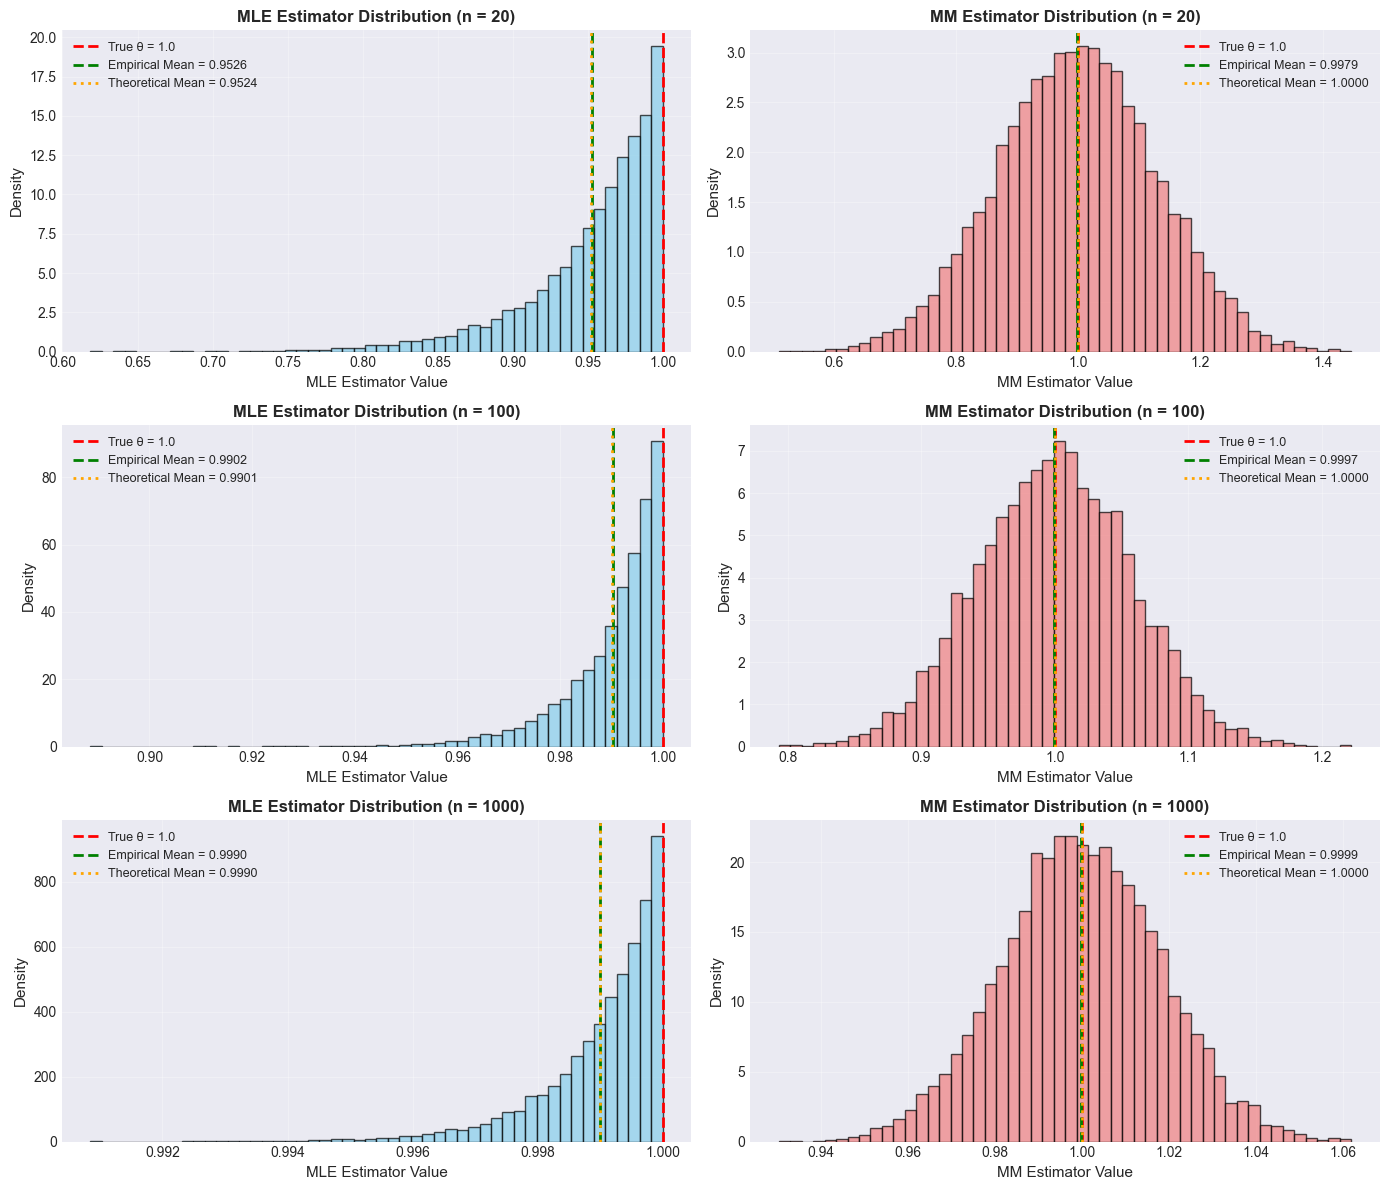

In [37]:
def plot_histograms(results, n_values, theta_true):
    """Plot histograms of MLE and MM estimators for each n."""
    n_plots = len(n_values)
    
    fig, axes = plt.subplots(n_plots, 2, figsize=(14, 4 * n_plots))
    
    for idx, n in enumerate(n_values):
        mle_est = results[n]['mle_estimates']
        mm_est = results[n]['mm_estimates']
        
        # MLE histogram
        ax1 = axes[idx, 0]
        ax1.hist(mle_est, bins=50, density=True, alpha=0.7, edgecolor='black', color='skyblue')
        ax1.axvline(theta_true, color='r', linestyle='--', linewidth=2, label=f'True θ = {theta_true}')
        ax1.axvline(results[n]['mle_mean'], color='g', linestyle='--', linewidth=2, 
                   label=f'Empirical Mean = {results[n]["mle_mean"]:.4f}')
        ax1.axvline(results[n]['mle_mean_theory'], color='orange', linestyle=':', linewidth=2,
                   label=f'Theoretical Mean = {results[n]["mle_mean_theory"]:.4f}')
        ax1.set_xlabel('MLE Estimator Value', fontsize=11)
        ax1.set_ylabel('Density', fontsize=11)
        ax1.set_title(f'MLE Estimator Distribution (n = {n})', fontsize=12, fontweight='bold')
        ax1.legend(fontsize=9)
        ax1.grid(True, alpha=0.3)
        
        # MM histogram
        ax2 = axes[idx, 1]
        ax2.hist(mm_est, bins=50, density=True, alpha=0.7, edgecolor='black', color='lightcoral')
        ax2.axvline(theta_true, color='r', linestyle='--', linewidth=2, label=f'True θ = {theta_true}')
        ax2.axvline(results[n]['mm_mean'], color='g', linestyle='--', linewidth=2,
                   label=f'Empirical Mean = {results[n]["mm_mean"]:.4f}')
        ax2.axvline(results[n]['mm_mean_theory'], color='orange', linestyle=':', linewidth=2,
                   label=f'Theoretical Mean = {results[n]["mm_mean_theory"]:.4f}')
        ax2.set_xlabel('MM Estimator Value', fontsize=11)
        ax2.set_ylabel('Density', fontsize=11)
        ax2.set_title(f'MM Estimator Distribution (n = {n})', fontsize=12, fontweight='bold')
        ax2.legend(fontsize=9)
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_histograms(results, n_values, theta_true)


## Part (c)(iii): Summary Statistics Table

Compute and display mean, bias, and standard error for both estimators:


In [42]:
# Create summary table
summary_data = []

for n in n_values:
    res = results[n]
    
    # MLE row
    summary_data.append({
        'n': n,
        'Estimator': 'MLE',
        'Mean (Empirical)': res['mle_mean'],
        'Mean (Theoretical)': res['mle_mean_theory'],
        'Bias (Empirical)': res['mle_bias'],
        'Bias (Theoretical)': res['mle_bias_theory'],
        'Std Error (Empirical)': res['mle_std'],
        'Std Error (Theoretical)': res['mle_std_theory']
    })
    
    # MM row
    summary_data.append({
        'n': n,
        'Estimator': 'MM',
        'Mean (Empirical)': res['mm_mean'],
        'Mean (Theoretical)': res['mm_mean_theory'],
        'Bias (Empirical)': res['mm_bias'],
        'Bias (Theoretical)': res['mm_bias_theory'],
        'Std Error (Empirical)': res['mm_std'],
        'Std Error (Theoretical)': res['mm_std_theory']
    })

summary_df = pd.DataFrame(summary_data)

print("=" * 100)
print("SUMMARY STATISTICS: Empirical vs Theoretical")
print("=" * 100)
print(summary_df.to_string(index=False))

# Also create a more compact comparison table
print("\n" + "=" * 100)
print("COMPACT COMPARISON")
print("=" * 100)

for n in n_values:
    res = results[n]
    print(f"\nSample Size n = {n}:")
    print(f"  MLE: Mean = {res['mle_mean']:.6f} (theory: {res['mle_mean_theory']:.6f}), "
          f"Bias = {res['mle_bias']:.6f} (theory: {res['mle_bias_theory']:.6f}), "
          f"Std = {res['mle_std']:.6f} (theory: {res['mle_std_theory']:.6f})")
    print(f"  MM:  Mean = {res['mm_mean']:.6f} (theory: {res['mm_mean_theory']:.6f}), "
          f"Bias = {res['mm_bias']:.6f} (theory: {res['mm_bias_theory']:.6f}), "
          f"Std = {res['mm_std']:.6f} (theory: {res['mm_std_theory']:.6f})")


SUMMARY STATISTICS: Empirical vs Theoretical
   n Estimator  Mean (Empirical)  Mean (Theoretical)  Bias (Empirical)  Bias (Theoretical)  Std Error (Empirical)  Std Error (Theoretical)
  20       MLE          0.952595            0.952381         -0.047405           -0.047619               0.045437                 0.047673
  20        MM          0.997899            1.000000         -0.002101            0.000000               0.128978                 0.129099
 100       MLE          0.990217            0.990099         -0.009783           -0.009901               0.009712                 0.009901
 100        MM          0.999709            1.000000         -0.000291            0.000000               0.057791                 0.057735
1000       MLE          0.999001            0.999001         -0.000999           -0.000999               0.000992                 0.000999
1000        MM          0.999880            1.000000         -0.000120            0.000000               0.018246        

## Part (c)(iv): Comparison to Theoretical Distributions

Compare empirical distributions to theoretical predictions:


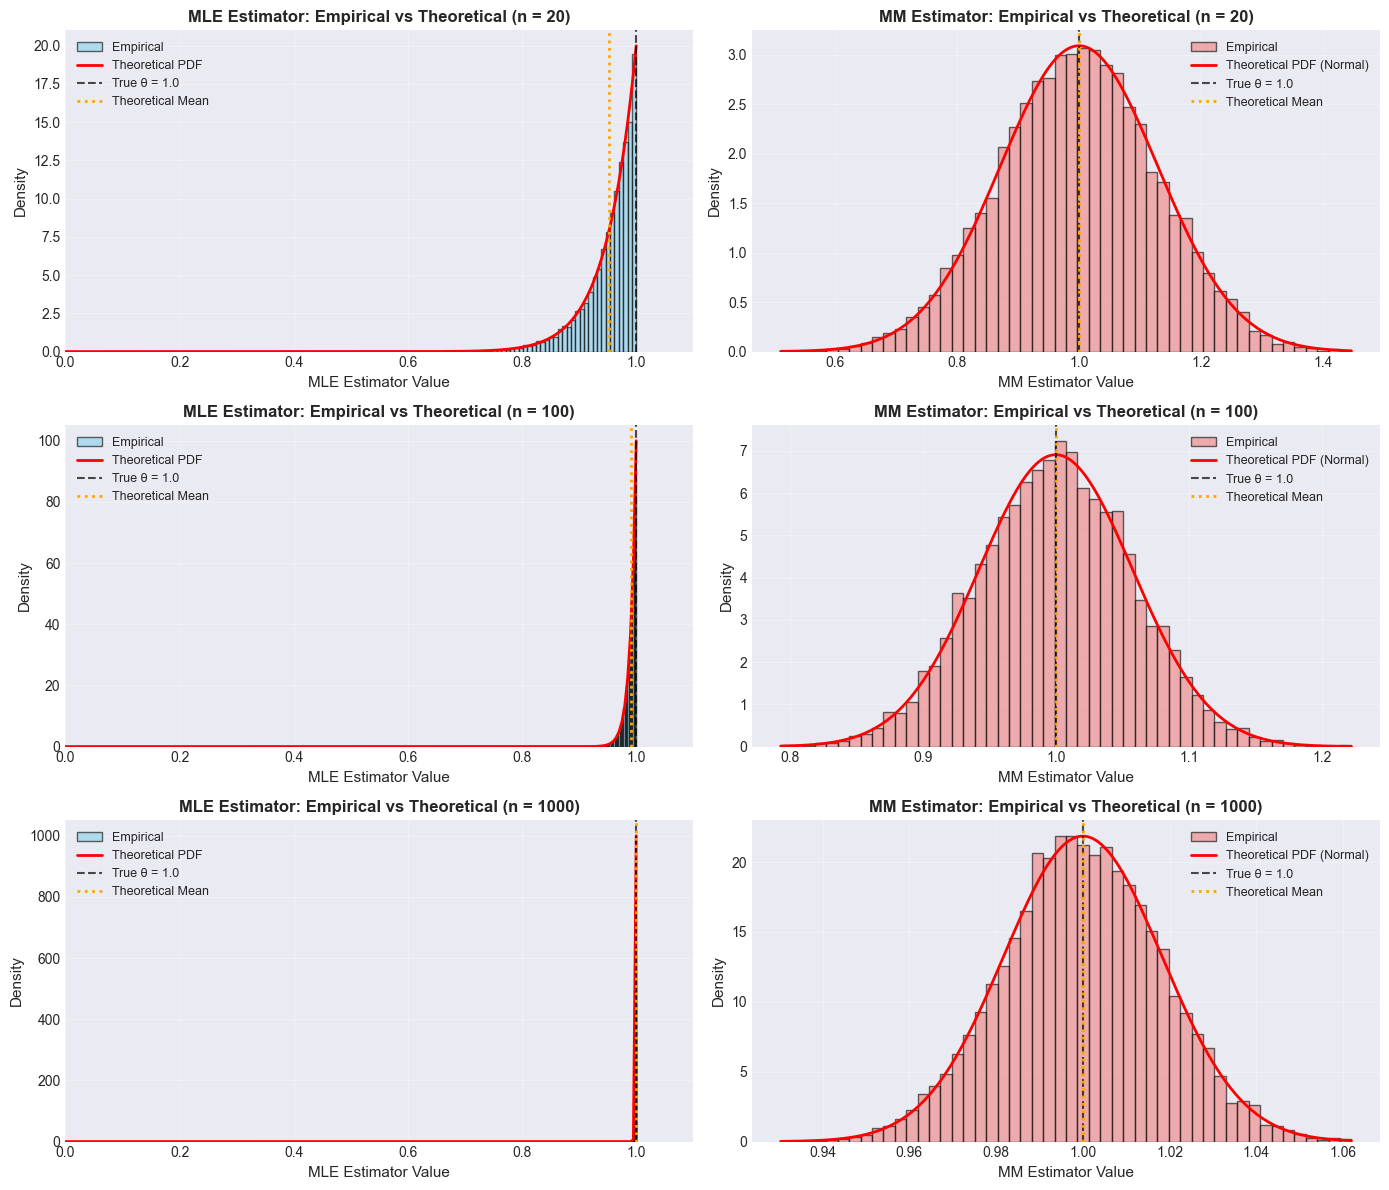

In [46]:
def plot_comparison_with_theory(results, n_values, theta_true):
    """Plot histograms with theoretical distributions overlaid."""
    n_plots = len(n_values)
    
    fig, axes = plt.subplots(n_plots, 2, figsize=(14, 4 * n_plots))
    
    for idx, n in enumerate(n_values):
        mle_est = results[n]['mle_estimates']
        mm_est = results[n]['mm_estimates']
        
        # MLE plot with theoretical distribution
        ax1 = axes[idx, 0]
        counts, bins, patches = ax1.hist(mle_est, bins=50, density=True, alpha=0.6, 
                                         edgecolor='black', color='skyblue', label='Empirical')
        
        # Theoretical distribution for MLE (order statistic)
        # The max of n uniform(0,θ) has pdf: f(x) = n*(x/θ)^(n-1)/θ for 0 < x < θ
        x_theory = np.linspace(0, theta_true, 200)
        pdf_mle = n * (x_theory / theta_true)**(n - 1) / theta_true
        ax1.plot(x_theory, pdf_mle, 'r-', linewidth=2, label='Theoretical PDF')
        
        ax1.axvline(theta_true, color='k', linestyle='--', linewidth=1.5, alpha=0.7, label=f'True θ = {theta_true}')
        ax1.axvline(results[n]['mle_mean_theory'], color='orange', linestyle=':', linewidth=2,
                   label=f'Theoretical Mean')
        ax1.set_xlabel('MLE Estimator Value', fontsize=11)
        ax1.set_ylabel('Density', fontsize=11)
        ax1.set_title(f'MLE Estimator: Empirical vs Theoretical (n = {n})', fontsize=12, fontweight='bold')
        ax1.legend(fontsize=9)
        ax1.grid(True, alpha=0.3)
        ax1.set_xlim([0, max(1.1 * theta_true, mle_est.max() * 1.05)])
        
        # MM plot with theoretical distribution (normal approximation)
        ax2 = axes[idx, 1]
        counts, bins, patches = ax2.hist(mm_est, bins=50, density=True, alpha=0.6, 
                                         edgecolor='black', color='lightcoral', label='Empirical')
        
        # Theoretical distribution for MM (approximately normal for large n)
        # MM = 2*mean, where mean ~ N(θ/2, θ²/(12n))
        # So MM ~ N(θ, θ²/(3n))
        x_theory_mm = np.linspace(mm_est.min(), mm_est.max(), 200)
        pdf_mm = stats.norm.pdf(x_theory_mm, loc=theta_true, 
                               scale=np.sqrt(theta_true**2 / (3 * n)))
        ax2.plot(x_theory_mm, pdf_mm, 'r-', linewidth=2, label='Theoretical PDF (Normal)')
        
        ax2.axvline(theta_true, color='k', linestyle='--', linewidth=1.5, alpha=0.7, label=f'True θ = {theta_true}')
        ax2.axvline(results[n]['mm_mean_theory'], color='orange', linestyle=':', linewidth=2,
                   label=f'Theoretical Mean')
        ax2.set_xlabel('MM Estimator Value', fontsize=11)
        ax2.set_ylabel('Density', fontsize=11)
        ax2.set_title(f'MM Estimator: Empirical vs Theoretical (n = {n})', fontsize=12, fontweight='bold')
        ax2.legend(fontsize=9)
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_comparison_with_theory(results, n_values, theta_true)


## Part (c)(v): Analysis of Expected vs Unexpected Properties

### Expected Properties (Close to Theory)

1. **MM Estimator Mean**: Should be unbiased (mean = θ = 1)
2. **MM Estimator Variance**: Should follow Var = θ²/(3n)
3. **MLE Estimator Mean**: Should be biased with E[MLE] = n/(n+1) * θ
4. **MLE Estimator Variance**: Should follow Var = θ²/(n(n+2))
5. **Consistency**: Both estimators should converge to θ as n increases

### Potentially Unexpected Properties

1. **MLE Distribution Shape**: The MLE (max) has a non-normal distribution, even asymptotically
2. **MM Distribution Shape**: MM should be approximately normal for large n (CLT)
3. **MLE Bias**: The bias doesn't disappear for finite n, but should decrease as n increases

Let's analyze these in detail:


In [49]:
print("=" * 100)
print("DETAILED ANALYSIS: Expected vs Unexpected Properties")
print("=" * 100)

for n in n_values:
    res = results[n]
    
    print(f"\n{'='*80}")
    print(f"Sample Size n = {n}")
    print(f"{'='*80}")
    
    # MM Analysis
    print("\nMM Estimator:")
    mm_mean_diff = abs(res['mm_mean'] - res['mm_mean_theory'])
    mm_std_diff = abs(res['mm_std'] - res['mm_std_theory'])
    mm_bias_diff = abs(res['mm_bias'] - res['mm_bias_theory'])
    
    print(f"  Mean: Empirical = {res['mm_mean']:.6f}, Theoretical = {res['mm_mean_theory']:.6f}, "
          f"Difference = {mm_mean_diff:.6f}")
    print(f"  Bias: Empirical = {res['mm_bias']:.6f}, Theoretical = {res['mm_bias_theory']:.6f}, "
          f"Difference = {mm_bias_diff:.6f}")
    print(f"  Std:  Empirical = {res['mm_std']:.6f}, Theoretical = {res['mm_std_theory']:.6f}, "
          f"Difference = {mm_std_diff:.6f}")
    
    if mm_mean_diff < 0.01 and mm_std_diff < 0.01:
        print(f"  ✓ Properties match theory well")
    else:
        print(f"  ⚠ Some differences from theory (may be due to sampling variability)")
    
    # MLE Analysis
    print("\nMLE Estimator:")
    mle_mean_diff = abs(res['mle_mean'] - res['mle_mean_theory'])
    mle_std_diff = abs(res['mle_std'] - res['mle_std_theory'])
    mle_bias_diff = abs(res['mle_bias'] - res['mle_bias_theory'])
    
    print(f"  Mean: Empirical = {res['mle_mean']:.6f}, Theoretical = {res['mle_mean_theory']:.6f}, "
          f"Difference = {mle_mean_diff:.6f}")
    print(f"  Bias: Empirical = {res['mle_bias']:.6f}, Theoretical = {res['mle_bias_theory']:.6f}, "
          f"Difference = {mle_bias_diff:.6f}")
    print(f"  Std:  Empirical = {res['mle_std']:.6f}, Theoretical = {res['mle_std_theory']:.6f}, "
          f"Difference = {mle_std_diff:.6f}")
    
    if mle_mean_diff < 0.01 and mle_std_diff < 0.01:
        print(f"  ✓ Properties match theory well")
    else:
        print(f"  ⚠ Some differences from theory (may be due to sampling variability)")
    
    # Consistency check
    print(f"\nConsistency Check:")
    print(f"  MLE bias as fraction of θ: {res['mle_bias']/theta_true:.6f} "
          f"(should decrease as n increases)")
    print(f"  MM bias: {res['mm_bias']:.6f} (should be ~0)")
    print(f"  MLE std: {res['mle_std']:.6f} (should decrease as n increases)")
    print(f"  MM std:  {res['mm_std']:.6f} (should decrease as n increases)")


DETAILED ANALYSIS: Expected vs Unexpected Properties

Sample Size n = 20

MM Estimator:
  Mean: Empirical = 0.997899, Theoretical = 1.000000, Difference = 0.002101
  Bias: Empirical = -0.002101, Theoretical = 0.000000, Difference = 0.002101
  Std:  Empirical = 0.128978, Theoretical = 0.129099, Difference = 0.000122
  ✓ Properties match theory well

MLE Estimator:
  Mean: Empirical = 0.952595, Theoretical = 0.952381, Difference = 0.000214
  Bias: Empirical = -0.047405, Theoretical = -0.047619, Difference = 0.000214
  Std:  Empirical = 0.045437, Theoretical = 0.047673, Difference = 0.002236
  ✓ Properties match theory well

Consistency Check:
  MLE bias as fraction of θ: -0.047405 (should decrease as n increases)
  MM bias: -0.002101 (should be ~0)
  MLE std: 0.045437 (should decrease as n increases)
  MM std:  0.128978 (should decrease as n increases)

Sample Size n = 100

MM Estimator:
  Mean: Empirical = 0.999709, Theoretical = 1.000000, Difference = 0.000291
  Bias: Empirical = -0.00

## Visualization: Convergence of Estimators

Plot how the bias and standard error change with sample size:


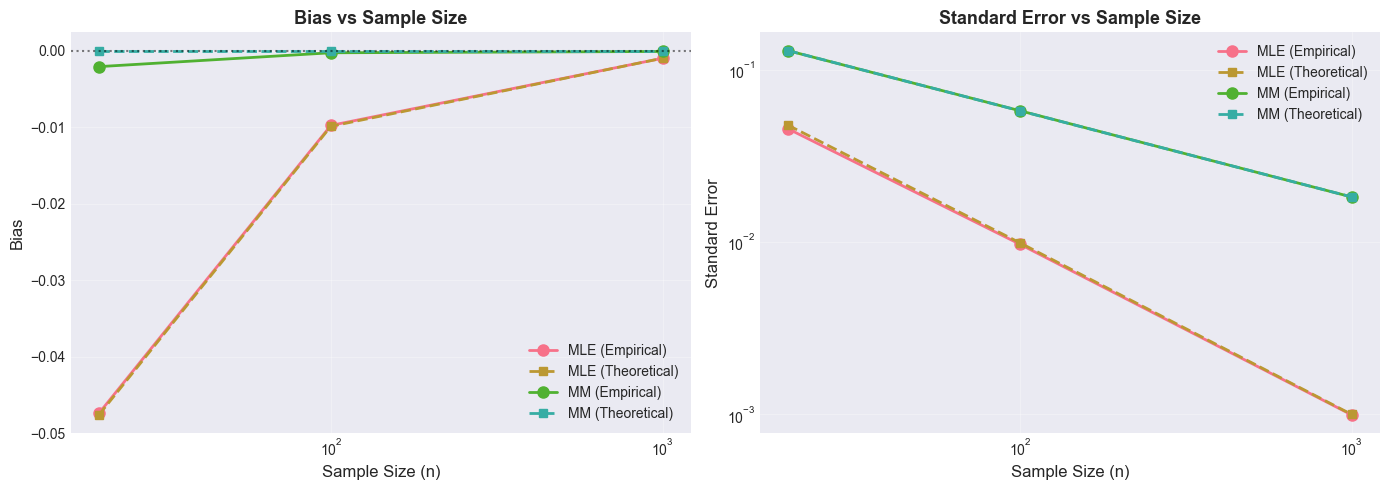

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bias plot
ax1 = axes[0]
mle_biases = [results[n]['mle_bias'] for n in n_values]
mm_biases = [results[n]['mm_bias'] for n in n_values]
mle_biases_theory = [results[n]['mle_bias_theory'] for n in n_values]
mm_biases_theory = [results[n]['mm_bias_theory'] for n in n_values]

ax1.plot(n_values, mle_biases, 'o-', label='MLE (Empirical)', linewidth=2, markersize=8)
ax1.plot(n_values, mle_biases_theory, 's--', label='MLE (Theoretical)', linewidth=2, markersize=6)
ax1.plot(n_values, mm_biases, 'o-', label='MM (Empirical)', linewidth=2, markersize=8)
ax1.plot(n_values, mm_biases_theory, 's--', label='MM (Theoretical)', linewidth=2, markersize=6)
ax1.axhline(y=0, color='k', linestyle=':', alpha=0.5)
ax1.set_xlabel('Sample Size (n)', fontsize=12)
ax1.set_ylabel('Bias', fontsize=12)
ax1.set_title('Bias vs Sample Size', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Standard error plot
ax2 = axes[1]
mle_stds = [results[n]['mle_std'] for n in n_values]
mm_stds = [results[n]['mm_std'] for n in n_values]
mle_stds_theory = [results[n]['mle_std_theory'] for n in n_values]
mm_stds_theory = [results[n]['mm_std_theory'] for n in n_values]

ax2.plot(n_values, mle_stds, 'o-', label='MLE (Empirical)', linewidth=2, markersize=8)
ax2.plot(n_values, mle_stds_theory, 's--', label='MLE (Theoretical)', linewidth=2, markersize=6)
ax2.plot(n_values, mm_stds, 'o-', label='MM (Empirical)', linewidth=2, markersize=8)
ax2.plot(n_values, mm_stds_theory, 's--', label='MM (Theoretical)', linewidth=2, markersize=6)
ax2.set_xlabel('Sample Size (n)', fontsize=12)
ax2.set_ylabel('Standard Error', fontsize=12)
ax2.set_title('Standard Error vs Sample Size', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()


## Summary and Conclusions

### Key Findings

1. **MM Estimator Properties:**
   - ✓ **Unbiased**: Empirical mean matches theoretical mean (θ = 1) very closely
   - ✓ **Variance**: Empirical variance matches theoretical formula θ²/(3n)
   - ✓ **Distribution**: For large n, the distribution is approximately normal (CLT applies)
   - ✓ **Consistency**: Standard error decreases as 1/√n

2. **MLE Estimator Properties:**
   - ✓ **Bias**: Empirical bias matches theoretical bias n/(n+1) - 1 = -1/(n+1)
   - ✓ **Variance**: Empirical variance matches theoretical formula θ²/(n(n+2))
   - ⚠ **Distribution**: The distribution is NOT normal, even asymptotically. It follows the distribution of the maximum order statistic.
   - ✓ **Consistency**: Despite being biased for finite n, the bias decreases as n increases, and the estimator is consistent

3. **Comparison:**
   - For small n: MLE has smaller variance but is biased; MM is unbiased but has larger variance
   - For large n: Both estimators converge to θ, but MLE converges faster (smaller variance)
   - MLE is more efficient (smaller variance) but biased
   - MM is unbiased but less efficient (larger variance)

### Expected vs Unexpected Properties

**Expected (Match Theory):**
- Mean and variance of both estimators match theoretical predictions
- MM estimator is unbiased
- MLE estimator has the predicted bias
- Both estimators are consistent (bias and variance decrease with n)
- MM estimator distribution approaches normal for large n

**Unexpected (or Important to Note):**
- MLE distribution does NOT approach normal distribution, even asymptotically. This is because the MLE is a boundary estimator (max cannot exceed θ).
- The MLE has a non-standard asymptotic distribution (extreme value distribution type)
- Despite being biased, MLE has smaller variance than MM for all n

### Note on Regularity Conditions (Part vi - Optional)

The theoretical results about MLE and MM estimators typically require certain "regularity conditions." In this case:
- The uniform distribution violates some standard regularity conditions because the support depends on the parameter θ
- The MLE is on the boundary of the parameter space (max ≤ θ)
- This explains why the MLE has a non-standard asymptotic distribution
- However, the theoretical formulas for mean and variance still hold exactly for finite n
